In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

## Importing Beer DF ##

In [2]:
beer = pd.read_csv('beer_final2.csv')

In [3]:
#creating new columns for srm and fg
#using mean of the two values
# beer['srmmean'] = beer[['srmmin','srmmax']].mean(axis=1)
# beer['fgmean'] = beer[['fgmin','fgmax']].mean(axis=1)

In [4]:
#changing style name to num_variables
beer_dict = {'Ale': 0, 'Hybrid': 1,'IPA':2, 'Lager': 3, 'Stout':4}
beer['style_name']= beer['style_name'].replace(beer_dict)

In [5]:
beer

,beer_name,abv,isorganic,isretired,status,brewery,category_name,style_name,ibumin,ibumax,abvmin,abvmax,srmmin,srmmax,original_gravity,fgmin,fgmax,ibu
0,Bearwalker Barrel Aged Double Maple,6.0,Y,N,verified,Jackalope Brewing Company,North American Origin Ales,0,25,45,4.0,6.4,15,26,1.040,1.010,1.018,26.0
1,Bearwalker Brown,5.1,N,N,verified,Jackalope Brewing Company,North American Origin Ales,0,25,45,4.0,6.4,15,26,1.040,1.010,1.018,43.0
2,Cabin Fever,6.5,N,N,verified,New Holland Brewing Company,North American Origin Ales,0,25,45,4.0,6.4,15,26,1.065,1.010,1.018,25.0
3,Deuce,7.0,N,N,verified,Oskar Blues Brewery,North American Origin Ales,0,25,45,4.0,6.4,15,26,1.040,1.010,1.018,35.0
4,Family Values,8.5,N,N,verified,Sierra Nevada Brewing Company,North American Origin Ales,0,25,45,4.0,6.4,15,26,1.083,1.010,1.018,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,Milk Stout,5.8,N,N,verified,Wachusett Brewing Company,British Origin Ales,4,15,25,3.0,6.0,40,40,1.045,1.012,1.020,28.0
1082,Nitro Series: Chocolate Orange Stout,6.0,N,N,verified,Breckenridge Brewery,British Origin Ales,4,15,25,3.0,6.0,40,40,1.045,1.012,1.020,13.0
1083,Smidy,5.2,N,N,verified,Oskar Blues Brewery,British Origin Ales,4,15,25,3.0,6.0,40,40,1.045,1.012,1.020,22.0
1084,Whole Lotta Lov,5.4,N,N,verified,Zero Gravity Craft Brewery,British Origin Ales,4,15,25,3.0,6.0,40,40,1.063,1.012,1.020,20.0


### visualization of category of beer ###

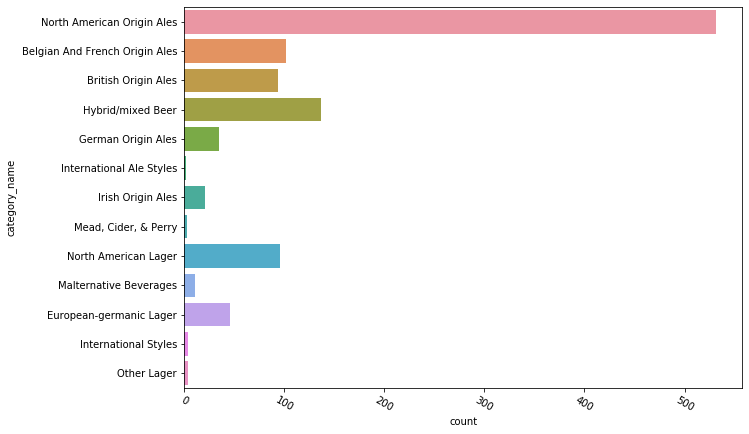

In [6]:
# viewing the count of category names
f,categcount = plt.subplots(figsize=(10,7))
plt.xticks(rotation=330)
categcount = sns.countplot(y='category_name',data=beer)

In [7]:
#numbers of category_name
beer.category_name.value_counts()

North American Origin Ales        531
Hybrid/mixed Beer                 137
Belgian And French Origin Ales    102
North American Lager               96
British Origin Ales                94
European-germanic Lager            46
German Origin Ales                 35
Irish Origin Ales                  21
Malternative Beverages             11
International Styles                4
Other Lager                         4
Mead, Cider, & Perry                3
International Ale Styles            2
Name: category_name, dtype: int64

### visualization of distribution of type of beer ###

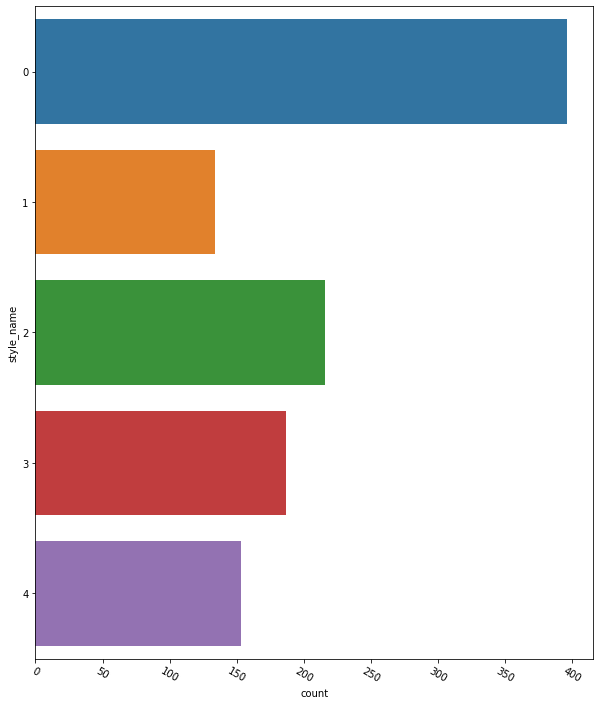

In [8]:
f,styleplot = plt.subplots(figsize=(10,12))
plt.xticks(rotation=330)
styleplot = sns.countplot(y='style_name',data=beer)

Ale: 0, Hybrid: 1, IPA: 2, Lager: 3, Stout: 4

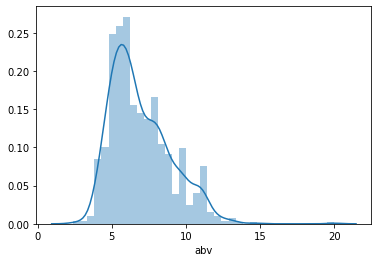

In [53]:
sns.distplot(beer.abv)

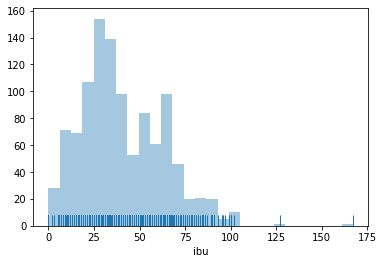

In [60]:
#distribution of ibu
sns.distplot(beer.ibu, kde=False, rug=True)

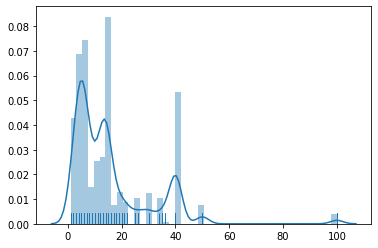

In [64]:
#distribution of SRM max & min
sns.distplot([beer.srmmin,beer.srmmax], rug=True)

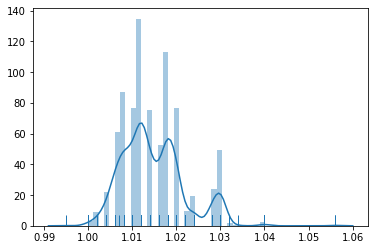

In [65]:
sns.distplot([beer.fgmin,beer.fgmax], rug=True)

### Creating Dummies for categorical data ###

In [12]:
beer_with_dummies = pd.get_dummies(beer, columns = ['category_name','isorganic','isretired','brewery'],drop_first=True)
#including all variables beer_with_dummies = pd.get_dummies(beer, columns = ['category_name','isorganic','isretired','brewery'],drop_first=True)
#excluding category_name beer_with_dummies = pd.get_dummies(beer, columns = ['isorganic','isretired','brewery'],drop_first=True)
#excluding brewery & category beer_with_dummies = pd.get_dummies(beer, columns = ['isorganic','isretired'],drop_first=True)

### heatmap for correlations ###

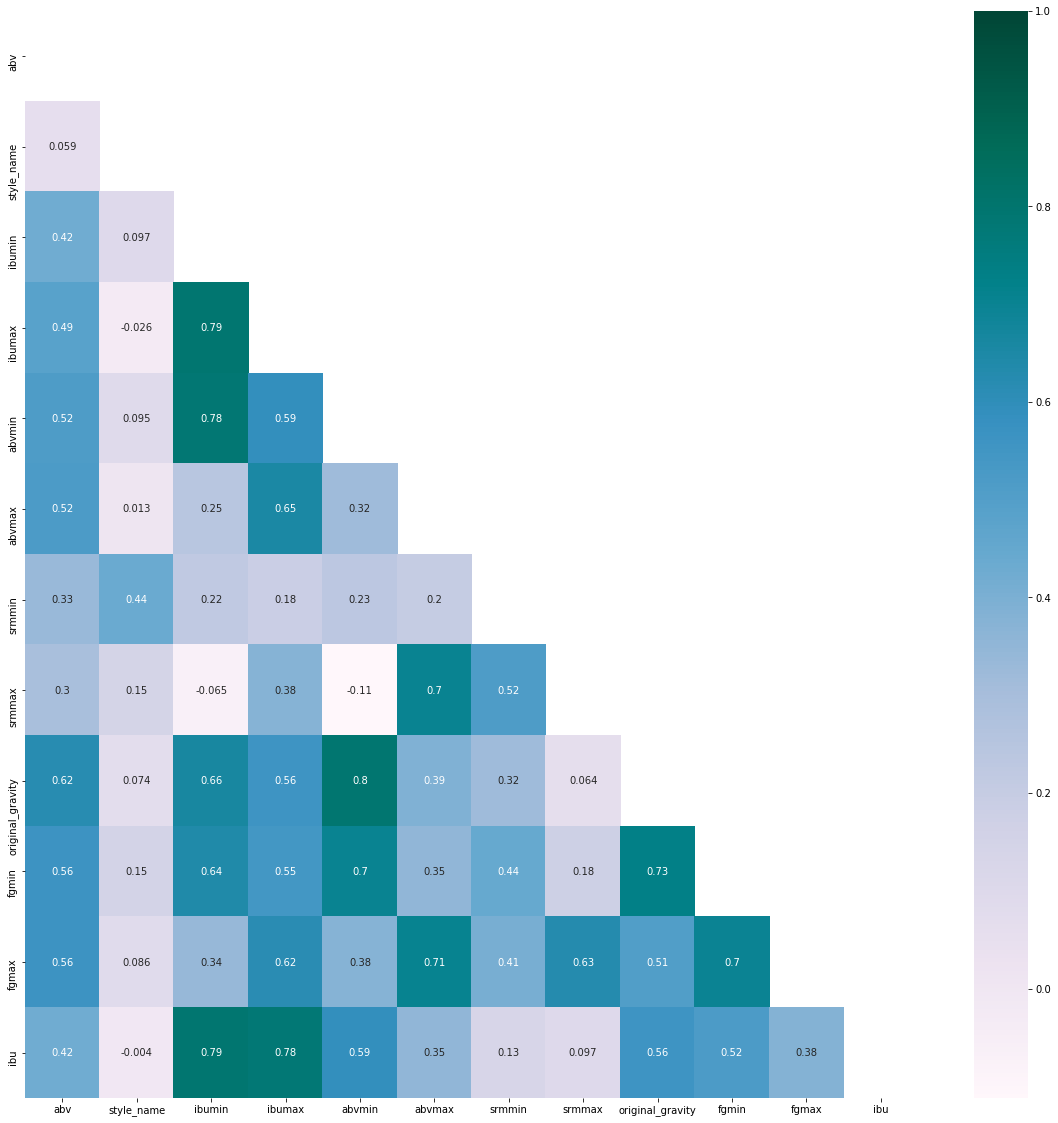

In [13]:
corr = beer.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, beer_correlplot = plt.subplots(figsize=(20, 20))
beer_correlplot = sns.heatmap(corr,mask=mask,cmap="PuBuGn",annot = True)

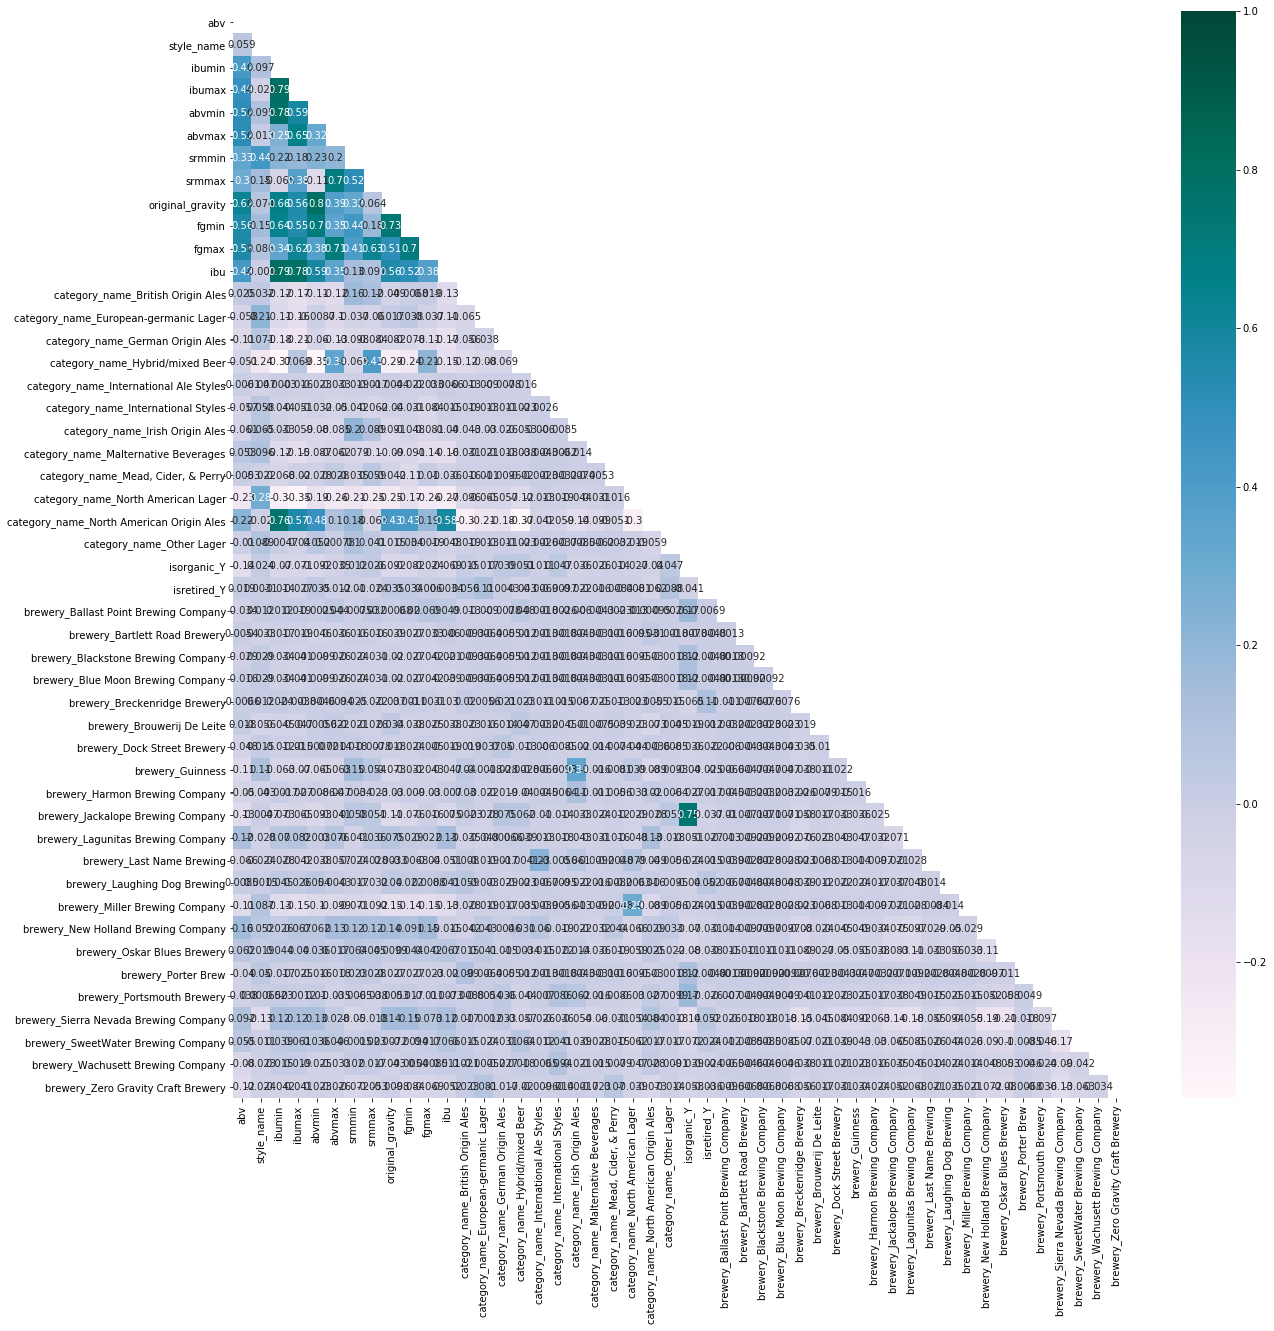

In [14]:
corr = beer_with_dummies.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, beer_correlplot = plt.subplots(figsize=(20, 20))
beer_correlplot = sns.heatmap(corr,mask=mask,cmap="PuBuGn",annot = True)

### establishing X and Y column for train test split ###

In [15]:
X = beer_with_dummies.drop(['beer_name','status','style_name'],axis=1)
y = beer_with_dummies['style_name']

In [16]:
# Running Train Test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Scaling Data ###

In [17]:
# i went with a min max scaler because i didn't want the outliers to be completely scaled down I believe
# with the dataset I am using a minmax would distribute more evenly
scaler = MinMaxScaler() 
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

### KNN Model Running ###

In [18]:
# I first decided to go with a KNN model due to what i was attempting to predict. With beer I thought certain characteristics is
# what determines the certain types of style of beer. So if the certain target beerstyle has certain similar characteristics
# that categorizes a beer in a certain style I thought a KNN model would be a good fit because its classifying entries
# based on similar neighbors that are closeby with similar characteristics.

In [19]:
knn_model = KNeighborsClassifier(n_neighbors=1,metric='euclidean',weights='distance')

In [20]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='distance')

In [21]:
knn_ypred = knn_model.predict(X_test)

In [22]:
print(accuracy_score(y_test, knn_ypred))
print(f1_score(y_test, knn_ypred, average = 'weighted'))

0.8419117647058824
0.840811619843969


### RFC Params ###

In [23]:
rfc_params = { 
    'n_estimators': [100,150,500,1000,1500,2000],
    'max_depth': [13,15,16,20,25],
    'max_features': [11,12,15],
    'criterion': ['gini'],
    'class_weight': ['balanced']}

### RFC Model Running (including GridSearchCV) ###

In [24]:
#create a grid search object and fit it to the data
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc,rfc_params,cv=7,n_jobs=-1,verbose=2)
rfc_grid.fit(X_train,y_train)

Fitting 7 folds for each of 90 candidates, totalling 630 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   49.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 630 out of 630 | elapsed:  4.1min finished


GridSearchCV(cv=7, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

#### Saving my Y-Predictions for RFC ####

In [25]:
rfc_pred = rfc_grid.predict(X_test)

In [26]:
print(rfc_grid.best_score_)
print(rfc_grid.best_params_)
print(rfc_grid.best_estimator_)
print(accuracy_score(y_test, rfc_pred))
print(f1_score(y_test, rfc_pred, average = 'weighted'))

0.9840533030188202
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 20, 'max_features': 11, 'n_estimators': 100}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=20, max_features=11,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.9742647058823529
0.9744216075450384


In [27]:
rfcbest_pred = rfc_grid.best_estimator_.predict(X_test)
print(accuracy_score(y_test, rfcbest_pred))
print(f1_score(y_test, rfcbest_pred, average = 'weighted'))

0.9742647058823529
0.9744216075450384


#### Checking feature Importances ####

In [28]:
rfc_best = RandomForestClassifier(class_weight='balanced',criterion='gini',max_depth=13,max_features=11,n_estimators=150).fit(X_train,y_train)

In [29]:
rfc_fi = rfc_best.feature_importances_

In [30]:
rfc_fi

array([1.62509626e-02, 1.15856357e-01, 1.01258088e-01, 7.77341176e-02,
       7.08788648e-02, 1.52134240e-01, 1.50196542e-01, 3.57972639e-02,
       5.09776206e-02, 5.56828334e-02, 1.88827232e-02, 1.13266782e-02,
       2.19118575e-02, 6.29022801e-03, 3.12485539e-02, 5.64488432e-05,
       4.56457838e-04, 1.76306896e-03, 9.18046780e-04, 5.27887293e-04,
       3.35491750e-02, 3.10783433e-02, 1.72884431e-04, 1.55034746e-03,
       4.91895373e-04, 4.19679280e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.59862599e-04, 4.64099759e-04, 6.09797682e-05,
       6.90496864e-04, 1.06677916e-04, 2.28574253e-03, 7.16172788e-04,
       2.50844278e-04, 8.31850950e-04, 0.00000000e+00, 7.40204408e-04,
       7.64858219e-04, 0.00000000e+00, 2.13190451e-04, 2.40318356e-03,
       7.56521837e-04, 1.44972787e-03, 5.94420685e-04])

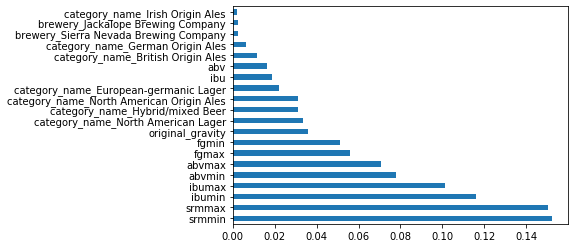

In [31]:
feat_importances = pd.Series(rfc_best.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [32]:
# I believed brewery and category would be the most prominent features
# Ran tests excluding Brewery and Category to see if those two variables were causing high correlation
# between style_name and the two variables (brewery or category)
# Results still came back with a high accuracy and f1 score of around .9632
# Also checked the feature importances when including brewery and category, was unable to find extreme significance
# in brewery/category to style_name

In [33]:
X.columns

Index(['abv', 'ibumin', 'ibumax', 'abvmin', 'abvmax', 'srmmin', 'srmmax',
       'original_gravity', 'fgmin', 'fgmax', 'ibu',
       'category_name_British Origin Ales',
       'category_name_European-germanic Lager',
       'category_name_German Origin Ales', 'category_name_Hybrid/mixed Beer',
       'category_name_International Ale Styles',
       'category_name_International Styles', 'category_name_Irish Origin Ales',
       'category_name_Malternative Beverages',
       'category_name_Mead, Cider, & Perry',
       'category_name_North American Lager',
       'category_name_North American Origin Ales', 'category_name_Other Lager',
       'isorganic_Y', 'isretired_Y', 'brewery_Ballast Point Brewing Company',
       'brewery_Bartlett Road Brewery', 'brewery_Blackstone Brewing Company',
       'brewery_Blue Moon Brewing Company', 'brewery_Breckenridge Brewery',
       'brewery_Brouwerij De Leite', 'brewery_Dock Street Brewery',
       'brewery_Guinness', 'brewery_Harmon Brewing Company

#### RFC Model Best Estimator Results ####

In [34]:
rfc_best_pred = rfc_grid.best_estimator_.predict(X_test)
print(accuracy_score(y_test, rfc_best_pred))
print(f1_score(y_test, rfc_best_pred, average = 'weighted'))

0.9742647058823529
0.9744216075450384


### RFC Model Confusion Plot ###

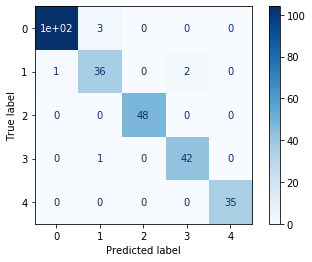

In [35]:
disp = plot_confusion_matrix(rfc_grid.best_estimator_, X_test, y_test,cmap=plt.cm.Blues)

### xGBoost Params ###

In [36]:
xgb_param = {'objective' :['binary:logistic'],
             'learning_rate' : [.03,.05,.07],
             'max_depth' : [7,11,15,20],
             'n_estimators' : [100,300,500,1000,2000]}

### xGBoost Model Running (including GridSearchCV) ###

In [37]:
xgb_model = xgb.XGBClassifier()
xgb_grid = GridSearchCV(xgb_model,xgb_param,cv=7,n_jobs=-1,verbose=2)
xgb_grid.fit(X_train,y_train)

Fitting 7 folds for each of 60 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:  7.4min finished


GridSearchCV(cv=7, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=-1,
             

#### Saving my Y-Predictions for xGBoost ####

In [38]:
xgb_pred = xgb_grid.predict(X_test)

In [39]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)
print(xgb_grid.best_estimator_)
print(accuracy_score(y_test, xgb_pred))
print(f1_score(y_test, xgb_pred, average = 'weighted'))

0.9791271946444359
{'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 500, 'objective': 'binary:logistic'}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
0.9705882352941176
0.9706084716548107


In [40]:
xgbbest_pred = xgb_grid.best_estimator_.predict(X_test)
print(accuracy_score(y_test, xgbbest_pred))
print(f1_score(y_test, xgbbest_pred, average = 'weighted'))

0.9705882352941176
0.9706084716548107


#### Checking my feature importance####

In [41]:
xgb_best = xgb.XGBClassifier(learning_rate=0.07,max_depth=15,max_features=11,n_estimators=1000).fit(X_train,y_train)

[21:10:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




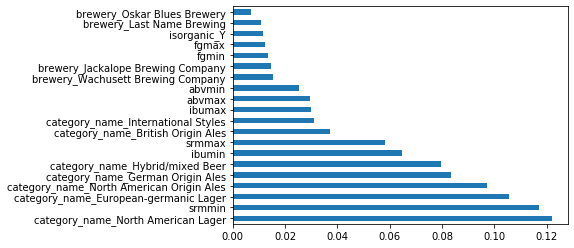

In [42]:
xgb_feat_importances = pd.Series(xgb_best.feature_importances_, index=X.columns)
xgb_feat_importances.nlargest(20).plot(kind='barh')

In [43]:
xgb_best_pred = xgb_best.predict(X_test)
print(accuracy_score(y_test, xgb_best_pred))
print(f1_score(y_test, xgb_best_pred, average = 'weighted'))

0.9705882352941176
0.9704845104185874


### xGBoost Model Confusion Plot ###

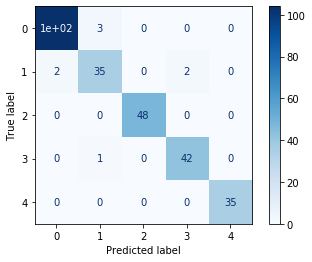

In [44]:
disp = plot_confusion_matrix(xgb_grid.best_estimator_, X_test, y_test,cmap=plt.cm.Blues)